# Dutch bank potential customers in money lending 

## Business problem

The importance of reducing credit risk has led a German financial institution to seek innovative solutions. As data scientists, we have been called upon to build an accurate and reliable machine learning model that is able to more accurately assess the probability of credit default of their customers.

Your main tasks will be:
1. Data Preprocessing: Perform data cleaning, handle missing values, coding of categorical variables and data normalization/scaling.
2. Data Exploration: Analyze and understand the provided data set, identify key variables and perform visualizations to understand relationships between variables and select relevant features.
3. Model Building: Experiment with some machine learning algorithms such as Logistic Regression, Decision Trees, Random Forest, Naive Bayes, among others.
4. Model Evaluation and Selection: Evaluate models using metrics such as accuracy, recall, area under the ROC curve, and F1-score. Select the model with the best performance for creditworthiness prediction.

## Install required libraries

Dependencies:
- pandas
- matplotlib
- seaborn

In [77]:
# pip install pandas
# pip install matplotlib 
# pip install seaborn 
# pip install sklearn
# pip install ipython

Note: you may need to restart the kernel to use updated packages.


## Import libraries

Let's start by importing the required libraries.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import HTML, display

## Import dataset

The dataset is available in the same directory as this notebook. Let's load the dataset and take a look at the first few rows.

In [27]:
pd.set_option('display.max_columns', None)
global df_bank, results

In [28]:
df_bank = pd.read_csv('german_credit.csv')
df_bank.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [18]:
df_bank.shape

(1000, 21)

In [20]:
df_bank.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [77]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [46]:
df_bank.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [53]:
columns = list(df_bank.select_dtypes(include = ['object']).columns)

for column in columns:
    print(f'Column name: { column }')
    print(list(df_bank[f'{ column }'].value_counts().index), end = '\n\n')

Column name: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']

Column name: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']

Column name: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']

Column name: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']

Column name: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']

Column name: personal_status_sex
['male : single', 'female : divorced/separated/married', 'male : married/widowed', 'male : divorced/s

## Transform data

The dataset contains a lot of columns that are not useful for our analysis. Let's transform the data into a format that is suitable for our analysis.

In [29]:
def process_data():
    global df_bank
    df_bank = df_bank.drop_duplicates() if df_bank.duplicated().any() else df_bank
    df_bank = df_bank.dropna() if df_bank.isnull().values.any() else df_bank

    a = {
        'no checking account': 4,
        '>= 200 DM / salary assignments for at least 1 year': 3,
        '0 <= ... < 200 DM': 2,
        '< 0 DM': 1
    }
    df_bank['account_check_status'] = df_bank['account_check_status'].map(a)

    a = { 
        'no credits taken/ all credits paid back duly' : 1,
        'all credits at this bank paid back duly' : 2,
        'existing credits paid back duly till now' : 3,
        'delay in paying off in the past' : 4,
        'critical account/ other credits existing (not at this bank)' : 5
    }
    df_bank['credit_history'] = df_bank['credit_history'].map(a)

    a = {
        'car (new)' : 1,
        'car (used)' : 2,
        'furniture/equipment' : 3,
        'radio/television' : 4,
        'domestic appliances' : 5,
        'repairs' : 6,
        'education' : 7,
        '(vacation - does not exist?)' : 8,
        'retraining' : 9,
        'business' : 10,
        'others' : 11
    }
    df_bank['purpose'] = df_bank['purpose'].map(a)

    a = {
        'unknown/ no savings account' : 1,
        '.. >= 1000 DM ' : 2,
        '500 <= ... < 1000 DM ' : 3,
        '100 <= ... < 500 DM' : 4,
        '... < 100 DM' : 5
    }
    df_bank['savings'] = df_bank['savings'].map(a)

    a = {
        '.. >= 7 years' : 1,
        '4 <= ... < 7 years' : 2,
        '1 <= ... < 4 years' : 3,
        '... < 1 year ' : 4,
        'unemployed' : 5
    }
    df_bank['present_emp_since'] = df_bank['present_emp_since'].map(a)

    a = {
        'male : divorced/separated' : 1,
        'female : divorced/separated/married' : 2,
        'male : single' : 3,
        'male : married/widowed' : 4,
        'female : single' : 5
    }
    df_bank['personal_status_sex'] = df_bank['personal_status_sex'].map(a)

    a = {
        'none' : 1,
        'co-applicant' : 2,
        'guarantor' : 3
    }
    df_bank['other_debtors'] = df_bank['other_debtors'].map(a)

    a = {
        'real estate' : 1,
        'if not A121 : building society savings agreement/ life insurance' : 2,
        'if not A121/A122 : car or other, not in attribute 6' : 3,
        'unknown / no property' : 4
    }
    df_bank['property'] = df_bank['property'].map(a)

    a = {
        'bank' : 1,
        'stores' : 2,
        'none' : 3
    }
    df_bank['other_installment_plans'] = df_bank['other_installment_plans'].map(a)

    a = {
        'rent' : 1,
        'own' : 2,
        'for free' : 3
    }
    df_bank['housing'] = df_bank['housing'].map(a)

    a = {
        'unemployed/ unskilled - non-resident' : 1,
        'unskilled - resident' : 2,
        'skilled employee / official' : 3,
        'management/ self-employed/ highly qualified employee/ officer' : 4
    }
    df_bank['job'] = df_bank['job'].map(a)

    a = {
        'yes, registered under the customers name ' : 1,
        'none' : 0
    }
    df_bank['telephone'] = df_bank['telephone'].map(a)

    a = {
        'yes' : 1,
        'no' : 0
    }
    df_bank['foreign_worker'] = df_bank['foreign_worker'].map(a)

process_data()

In [20]:
df_bank.sample(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
460,0,1,36,3,4,3620,5,3,1,3,3,2,2,37,3,2,1,3,2,0,1
849,1,1,12,3,5,709,5,1,4,3,1,4,1,57,2,2,1,2,1,0,1
932,0,4,9,5,1,1224,5,3,3,3,1,1,1,30,3,2,2,3,1,0,1
815,0,2,36,4,1,7432,5,3,2,2,1,2,2,54,3,1,1,3,1,0,1
323,0,1,18,3,4,2659,2,3,4,3,1,2,3,28,3,2,1,3,1,0,1


In [7]:
discrete_variables = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_bank[discrete_variables].tail(5)

,personal_status_sex,age,duration_in_month,credit_amount,default
995,2,31,12,1736,0
996,1,40,30,3857,0
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [30]:
# 'male : divorced/separated' : 1,
# 'female : divorced/separated/married' : 2,
# 'male : single' : 3,
# 'male : married/widowed' : 4,
# 'female : single' : 5

def feature_engineering():
    global df_bank
    dict_gender = { 1: 0, 2: 1, 3: 0, 4: 0, 5: 1 }
    dict_marital_status = { 3: 1, 5: 1, 1: 0, 2: 0, 4: 0 }
    
    df_bank['gender'] = df_bank['personal_status_sex'].map(dict_gender)
    df_bank['marital_status'] = df_bank['personal_status_sex'].map(dict_marital_status)
    df_bank['age_category'] = pd.cut(x = df_bank['age'], bins = [18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6]).astype(int)
    df_bank['credit_term_range'] = pd.cut(x = df_bank['duration_in_month'], bins = [1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6]).astype(int)
    df_bank['credit_value_range'] = pd.cut(x = df_bank['credit_amount'], 
                                            bins = [1, 1000, 2000, 3000, 4000, 
                                                    5000, 6000, 7000, 8000, 9000, 
                                                    10000, 11000, 12000, 13000, 
                                                    14000, 15000, 16000, 17000, 
                                                    18000, 19000, 20000], 
                                            labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 
                                                        10, 11, 12, 13, 14, 15, 16,
                                                        17, 18, 19, 20]).astype(int)
    df_bank = df_bank.drop(columns = ['personal_status_sex','age', 'duration_in_month','credit_amount'])

feature_engineering()

In [22]:
df_bank.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,gender,marital_status,age_category,credit_term_range,credit_value_range
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [23]:
df_bank.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,gender,marital_status,age_category,credit_term_range,credit_value_range
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


In [32]:
df_bank.drop(df_bank[df_bank['age_category'] == 6].index, inplace = True)

In [57]:
df_bank['age_category'].sample(5)

946    1
791    3
945    1
10     1
460    2
Name: age_category, dtype: int32

## Graphical analysis

Let's start by plotting some graphs to understand the data better.

C:\Users\Sebastián Dosman\AppData\Local\Temp\ipykernel_12940\120087922.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0] + 1)


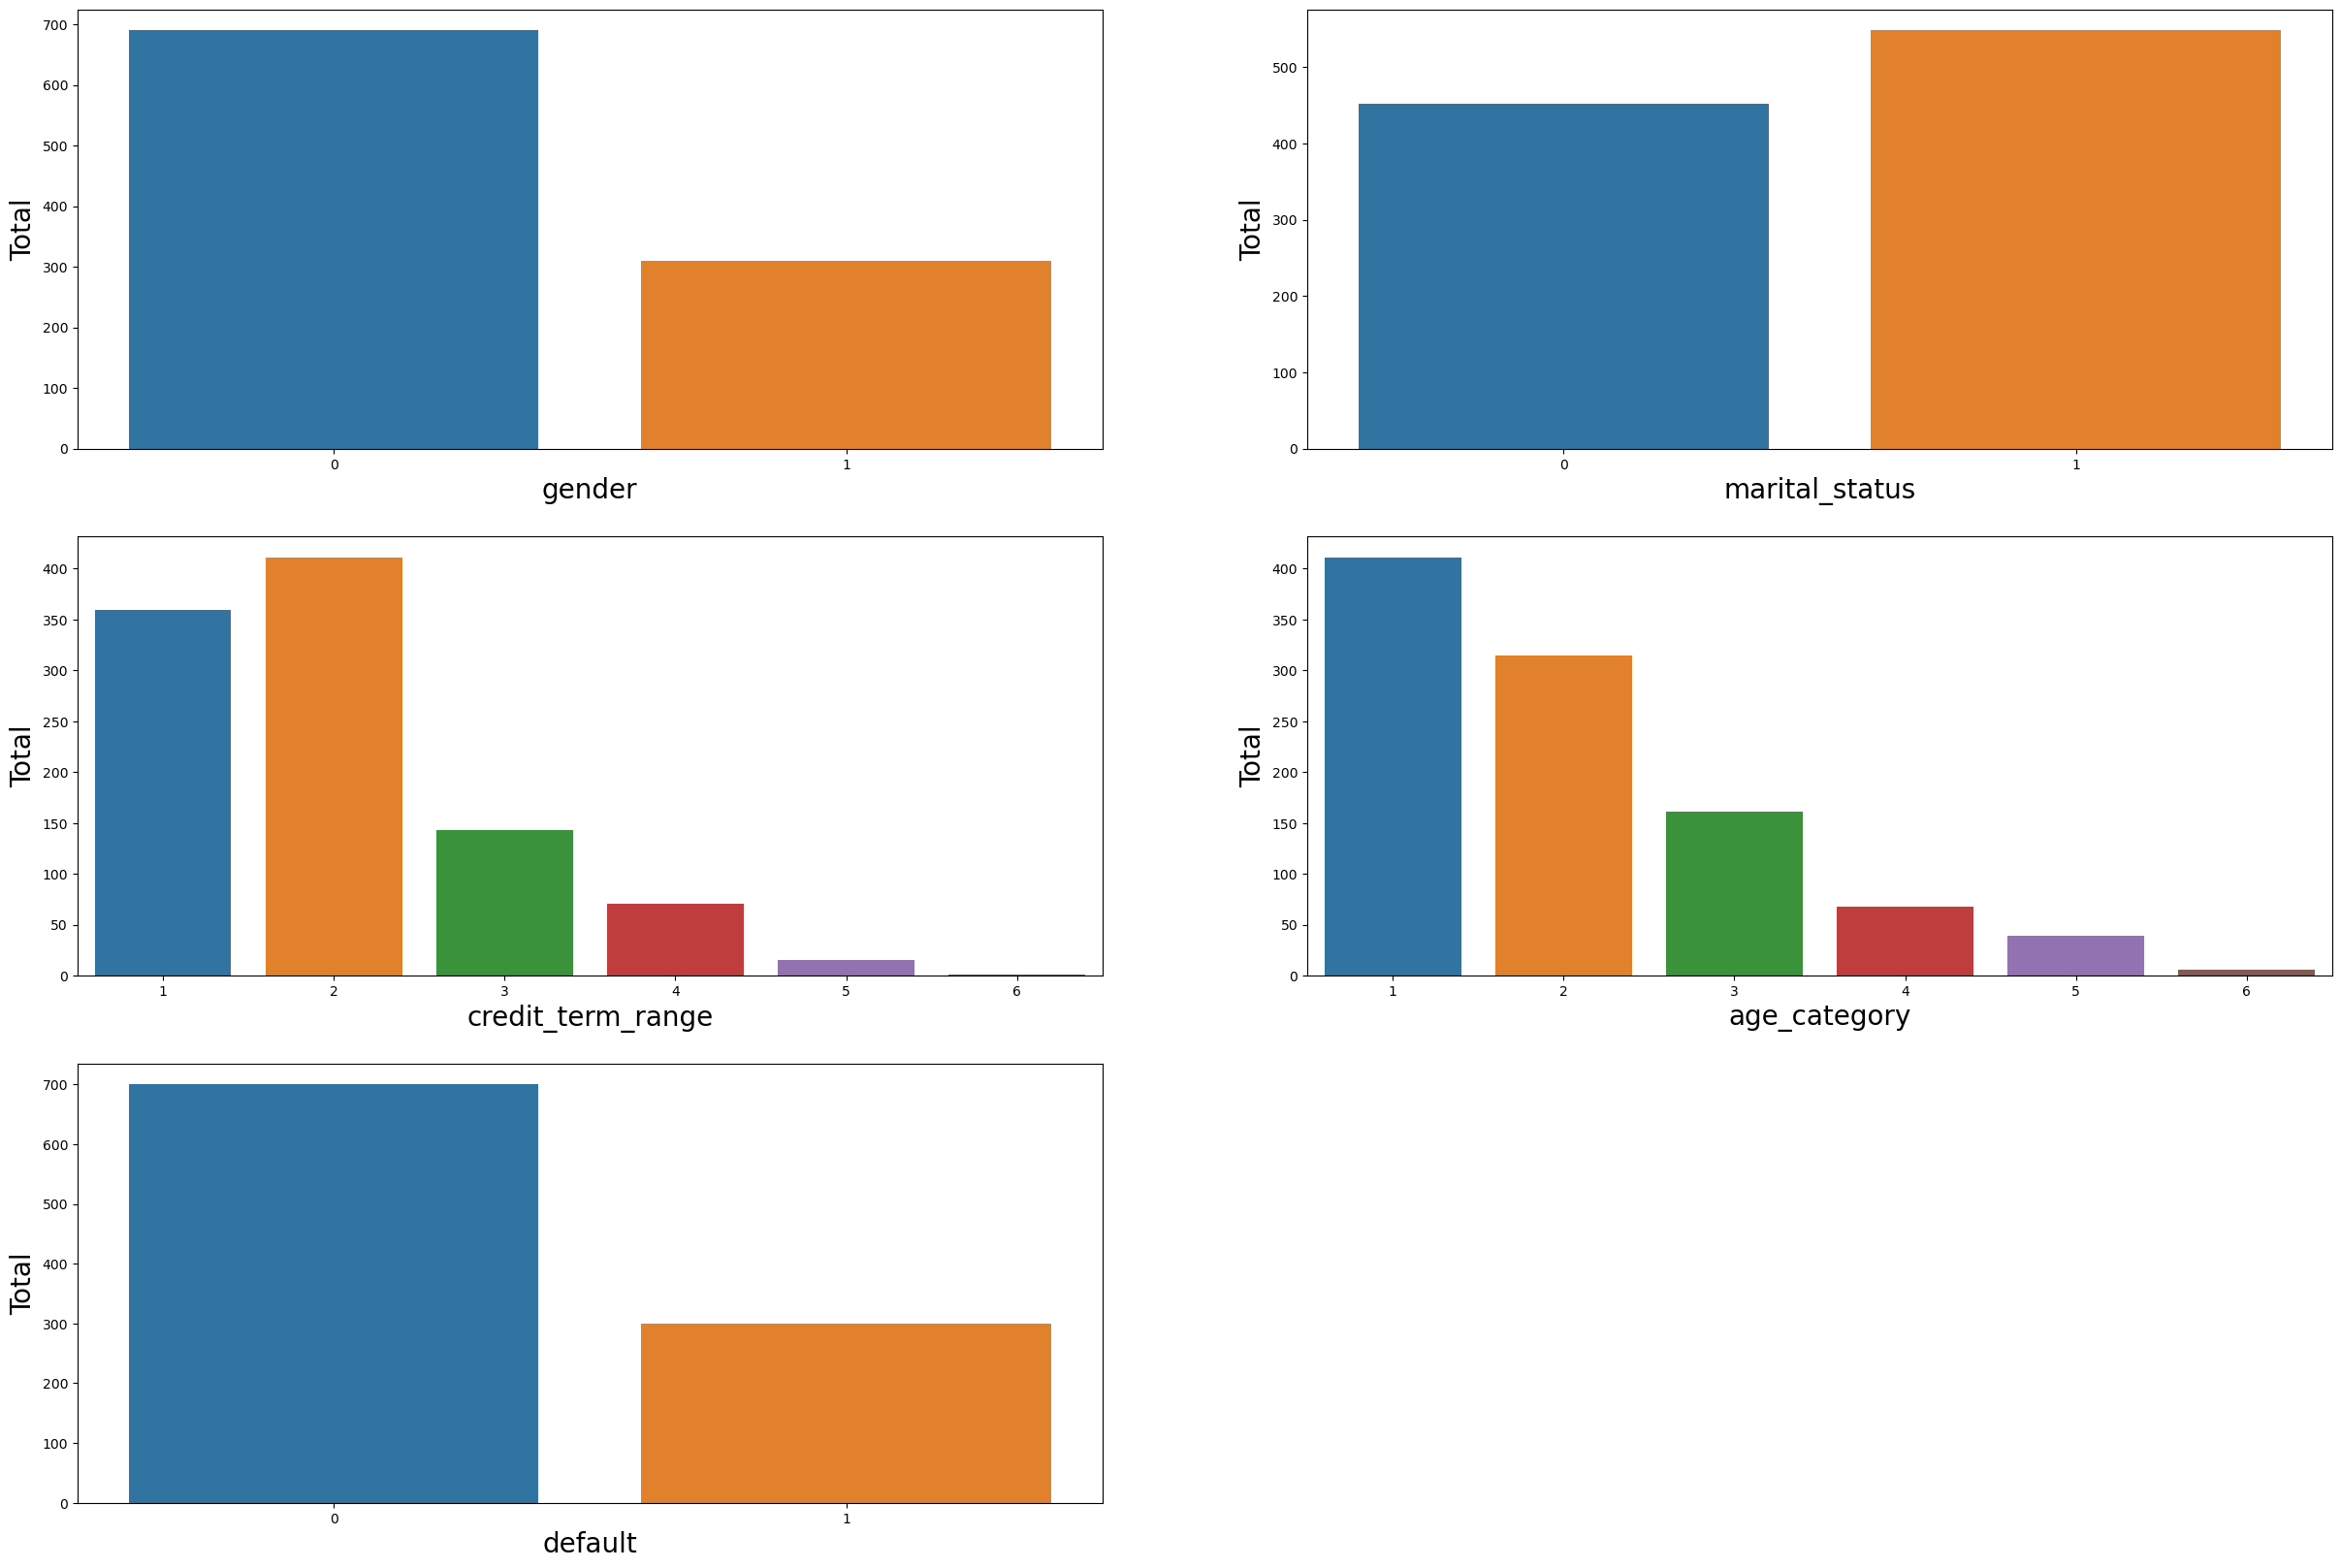

In [31]:
def exploratory_analysis():
    global df_bank
    graphics = ['gender', 'marital_status', 'credit_term_range', 'age_category', 'default']
    graphics_list = list(enumerate(graphics))
    
    plt.figure(figsize = (30, 20))
    plt.title('')
    
    for i in graphics_list:
        plt.subplot(3, 2, i[0] + 1)
        sns.countplot(x = i[1], data = df_bank)
        plt.xlabel(i[1], fontsize = 20)
        plt.ylabel('Total', fontsize = 20)

exploratory_analysis()

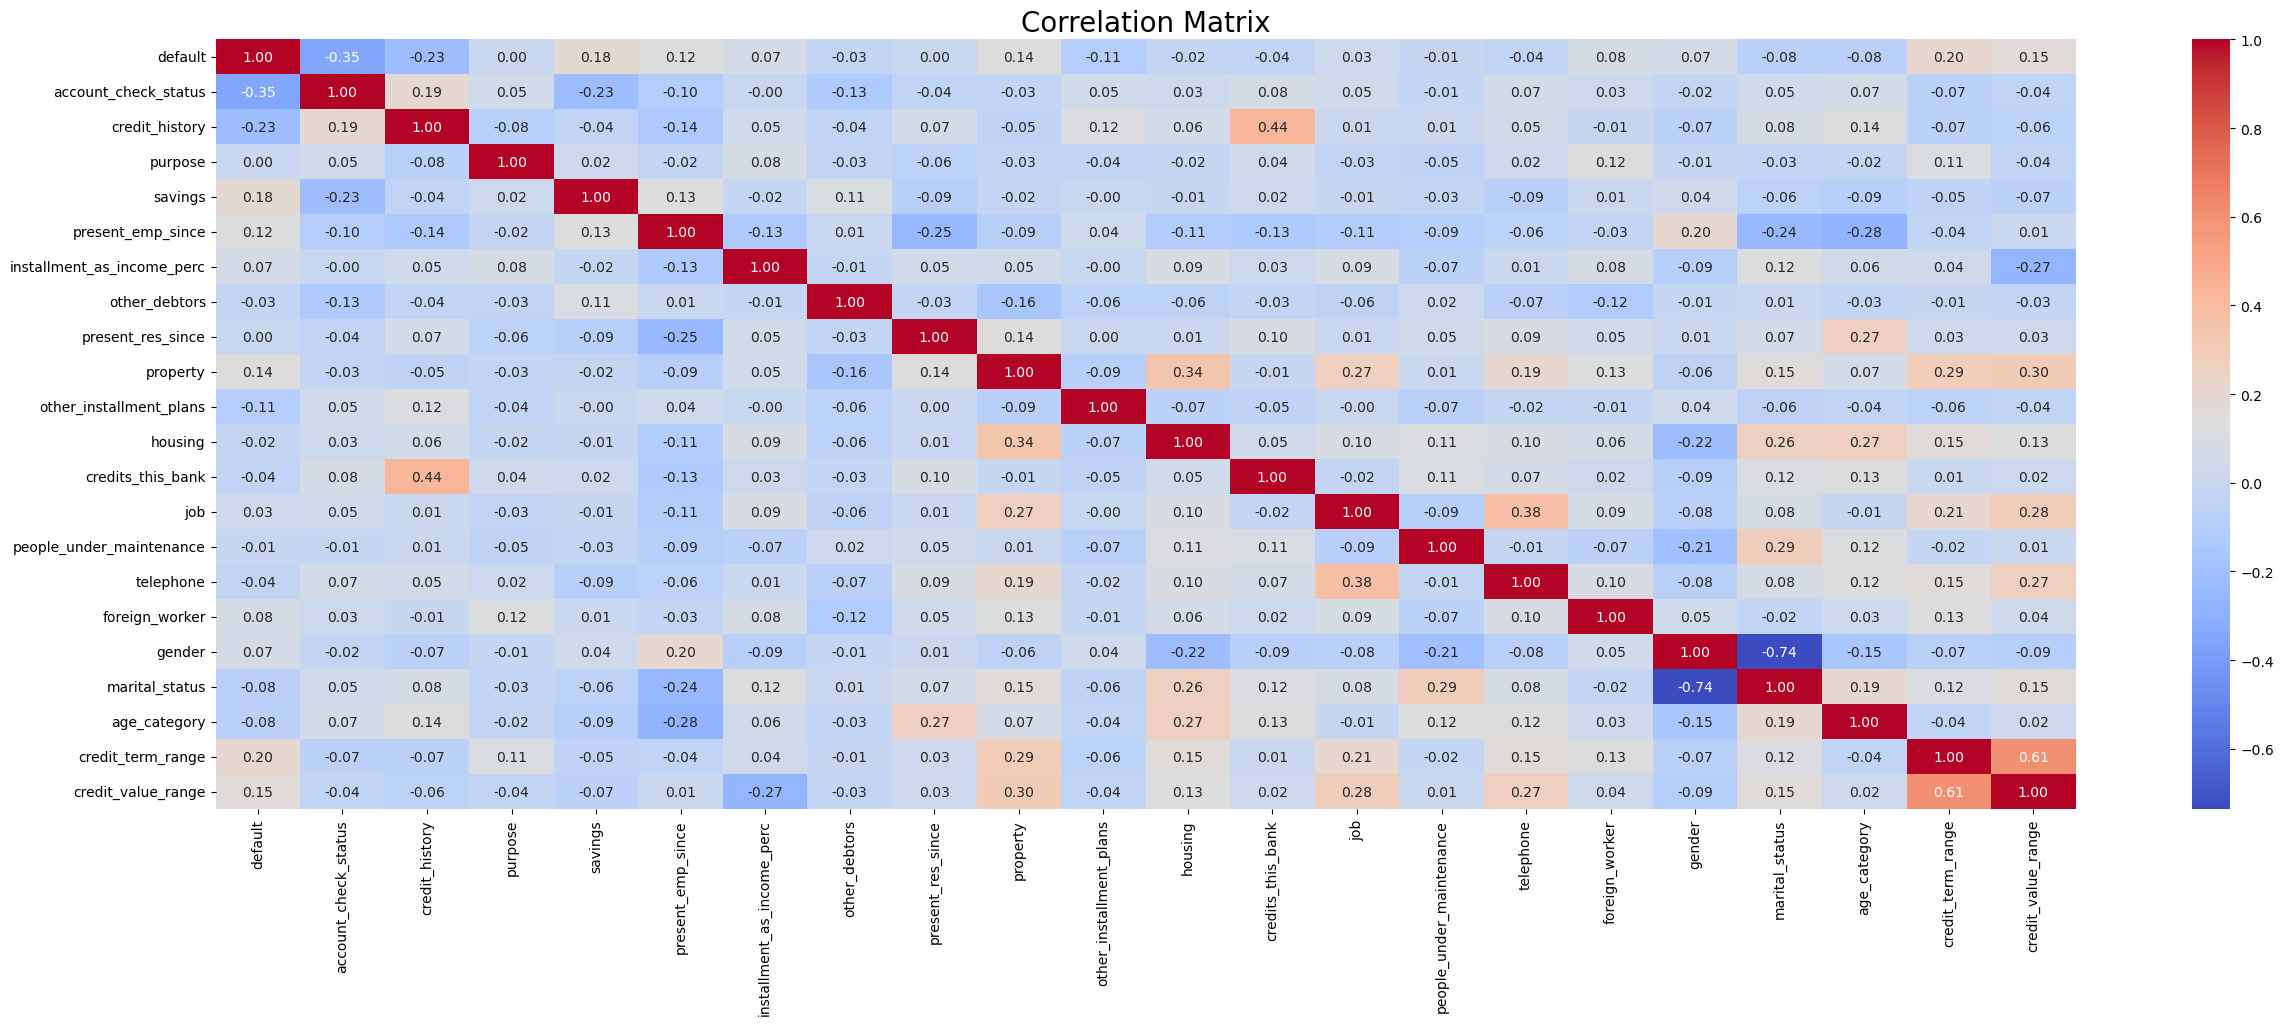

In [74]:
plt.figure(figsize = (30, 10))
heatmap = sns.heatmap(df_bank.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f') 
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

## Machine learning models

We will use a machine learning models to predict potential customers who are likely to take a loan.

In [69]:
def create_models():
    global df_bank, final_results 
    X = df_bank.drop(columns = 'default')
    y = df_bank['default']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 77)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = { 'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': [] }

    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    final_results = results

create_models()

c:\Users\Sebastián Dosman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
for i, model in enumerate(final_results['Model']):
    print(f'{ i }: { model }')
    print(f'Accuracy: { final_results["Accuracy"][i] }')
    print(f'Precision: { final_results["Precision"][i] }')
    print(f'Recall: { final_results["Recall"][i] }')
    print(f'F1-score: { final_results["F1-score"][i] }')
    print(f'AUC-ROC: { final_results["AUC-ROC"][i] }', end = '\n\n')

0: Logistic Regression
Accuracy: 0.745819397993311
Precision: 0.6885245901639344
Recall: 0.42424242424242425
F1-score: 0.525
AUC-ROC: 0.8046464646464647

1: Decision Tree
Accuracy: 0.7023411371237458
Precision: 0.5581395348837209
Recall: 0.48484848484848486
F1-score: 0.5189189189189188
AUC-ROC: 0.6474242424242425

2: Random Forest
Accuracy: 0.7491638795986622
Precision: 0.74
Recall: 0.37373737373737376
F1-score: 0.4966442953020134
AUC-ROC: 0.7886363636363637

3: Naive Bayes
Accuracy: 0.7190635451505016
Precision: 0.5806451612903226
Recall: 0.5454545454545454
F1-score: 0.5625
AUC-ROC: 0.7634343434343435



## Confusion matrix

Let's plot a confusion matrix to understand the performance of our model.

c:\Users\Sebastián Dosman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


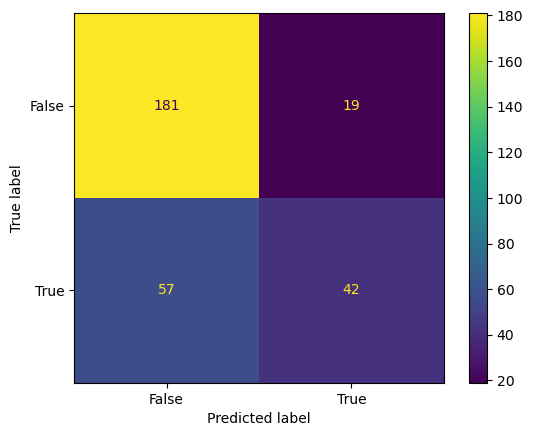

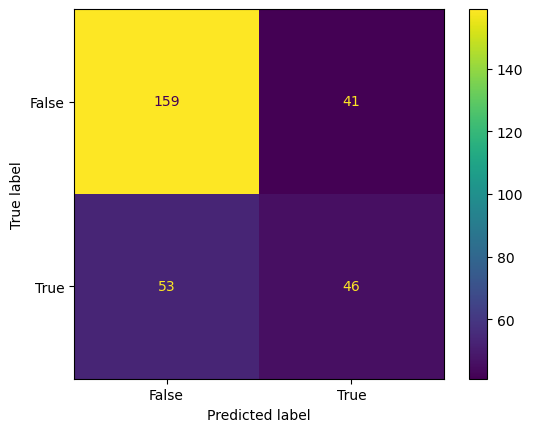

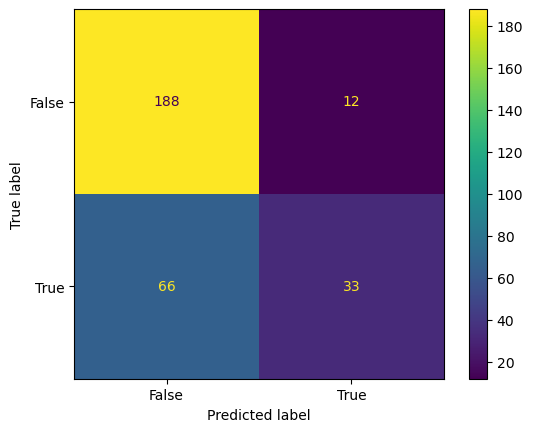

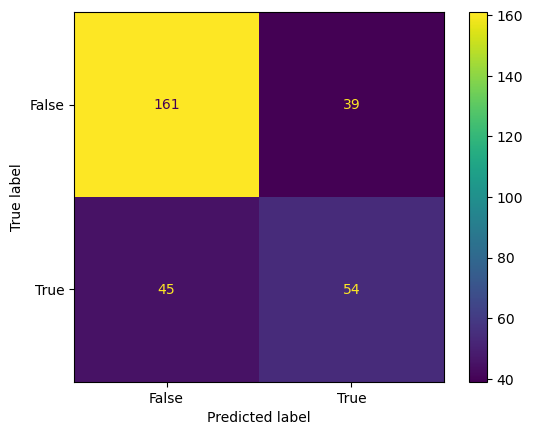

In [73]:
def confusion_matrix_graphic():
    global df_bank
    X = df_bank.drop(columns = 'default')
    y = df_bank['default']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 77)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        conf_matrix = confusion_matrix(y_test, predictions)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.show()

confusion_matrix_graphic()

## Model graphical analysis

Let's plot some graphs to understand the performance of our model.

C:\Users\Sebastián Dosman\AppData\Local\Temp\ipykernel_12940\3651880223.py:9: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind = 'bar', figsize = (12, 6), colormap = 'viridis', rot = 0, color = colors)
C:\Users\Sebastián Dosman\AppData\Local\Temp\ipykernel_12940\3651880223.py:9: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind = 'bar', figsize = (12, 6), colormap = 'viridis', rot = 0, color = colors)


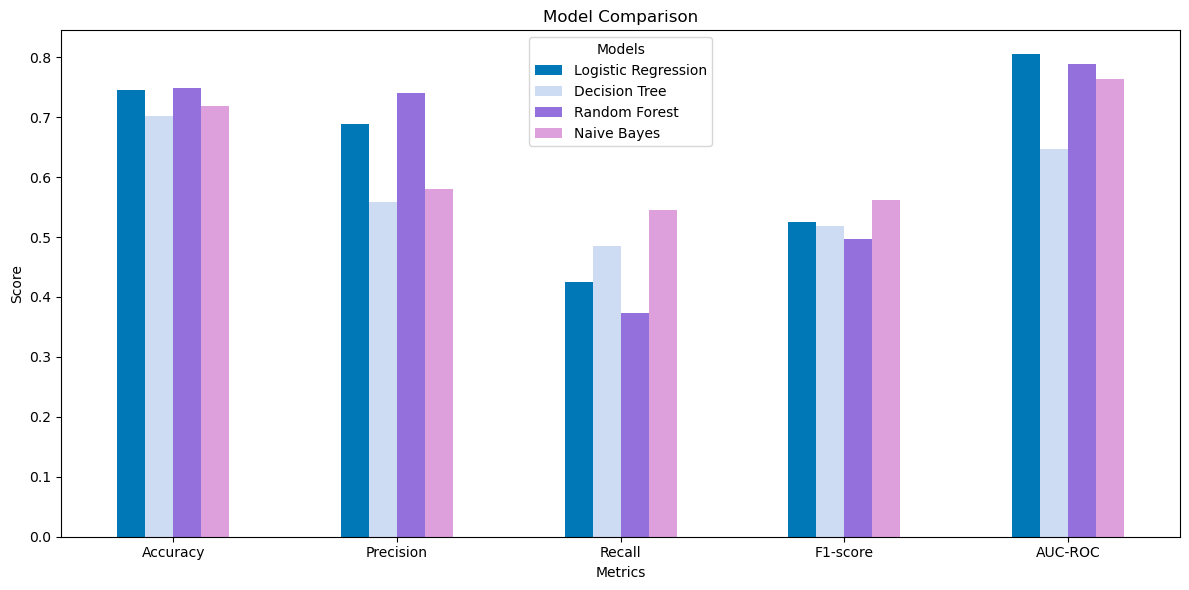

In [79]:
def graphic_results():
    global df_bank, final_results
    results_df = pd.DataFrame(final_results)
    results_df.set_index('Model', inplace = True)

    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

    results_df.plot(kind = 'bar', figsize = (12, 6), colormap = 'viridis', rot = 0, color = colors)
    plt.title('Model Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.legend(title = 'Models')
    plt.tight_layout()
    plt.show()

graphic_results()